In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
interval = '1m'
pairs = ['BTCUSDT', 'ETHUSDT','ADAUSDT','CHZUSDT','ENJUSDT','LINKUSDT','FILUSDT','XRPUSDT']

In [3]:
from trade_utils import initialize_ohlc_df
from binance_utils import update_historical_data

crypto_pairs_dict = {}

for pair in pairs:
    try:
        df = pd.read_csv('data/' + pair + '-' + interval + '-binance-all.csv')
        df['OpenTime'] = pd.to_datetime(df['OpenTime'])
        df.set_index('OpenTime', inplace=True)
    except FileNotFoundError:
        df = initialize_ohlc_df()
    
    df = update_historical_data(df, pair, interval)

    filename = 'data/' + pair + '-' + interval + '-binance-all.csv'
    df.to_csv(filename)

    crypto_pairs_dict[pair] = df


In [4]:
crypto_pairs_dict['BTCUSDT'].tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2021-07-15 10:35:00,32041.65,32079.94,32034.25,32062.87,55.891751
2021-07-15 10:36:00,32062.87,32065.78,31981.61,31996.28,79.886304
2021-07-15 10:37:00,31996.29,31999.65,31913.97,31944.12,107.629774
2021-07-15 10:38:00,31944.11,31983.51,31938.38,31970.01,57.656026
2021-07-15 10:39:00,31970.02,31999.94,31955.08,31993.31,46.950767


In [5]:
crypto_pairs_dict['ETHUSDT'].tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2021-07-15 10:35:00,1925.40,1928.33,1925.31,1927.53,972.46442
2021-07-15 10:36:00,1927.53,1928.77,1923.88,1924.91,814.73064
2021-07-15 10:37:00,1924.73,1924.73,1920.86,1921.98,910.25636
2021-07-15 10:38:00,1922.00,1925.27,1921.71,1923.87,610.86964
2021-07-15 10:39:00,1923.91,1925.00,1921.73,1921.90,419.54970


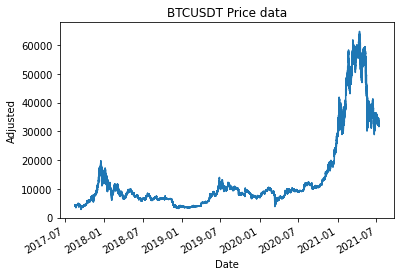

In [7]:
crypto_pairs_dict['BTCUSDT']['ClosePrice'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("BTCUSDT Price data")
plt.show()

In [8]:
BTCUSDT_daily_returns = crypto_pairs_dict['BTCUSDT']['ClosePrice'].pct_change()
BTCUSDT_monthly_returns = crypto_pairs_dict['BTCUSDT']['ClosePrice'].resample('M').ffill().pct_change()

In [9]:
BTCUSDT_daily_returns.head()

OpenTime
2017-08-17 04:00:00         NaN
2017-08-17 04:01:00    0.000000
2017-08-17 04:02:00    0.004477
2017-08-17 04:03:00   -0.004457
2017-08-17 04:04:00    0.000000
Name: ClosePrice, dtype: float64

In [10]:
BTCUSDT_monthly_returns.head()

OpenTime
2017-08-31         NaN
2017-09-30   -0.091137
2017-10-31    0.478382
2017-11-30    0.583202
2017-12-31    0.274304
Freq: M, Name: ClosePrice, dtype: float64

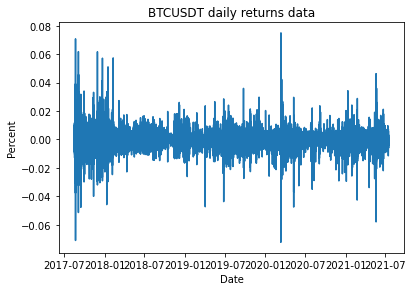

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(BTCUSDT_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("BTCUSDT daily returns data")
plt.show()

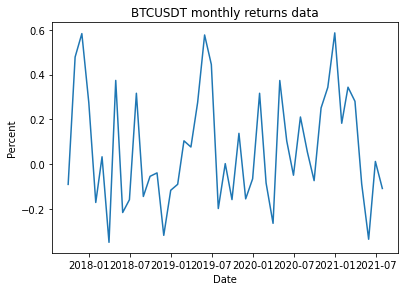

In [12]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(BTCUSDT_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("BTCUSDT monthly returns data")
plt.show()

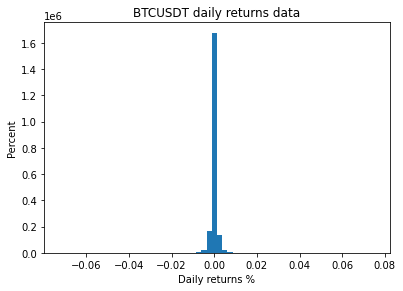

In [16]:
fig = plt.figure()
#ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
BTCUSDT_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("BTCUSDT daily returns data")
plt.show()

In [17]:
BTCUSDT_cum_returns = (BTCUSDT_daily_returns + 1).cumprod()

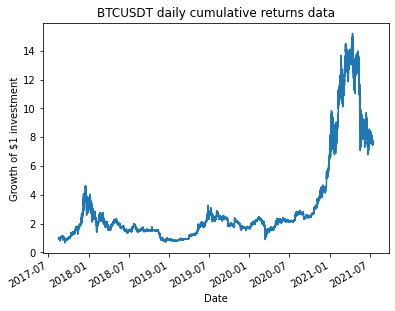

In [18]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
BTCUSDT_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("BTCUSDT daily cumulative returns data")
plt.show()

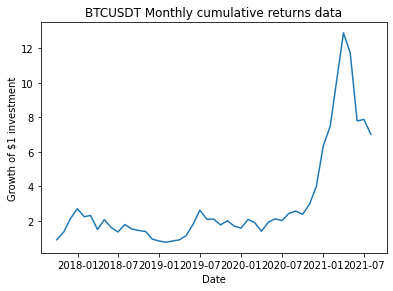

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
BTCUSDT_cum_returns = (BTCUSDT_monthly_returns + 1).cumprod()
ax1.plot(BTCUSDT_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("BTCUSDT Monthly cumulative returns data")
plt.show()

<Figure size 432x288 with 0 Axes>

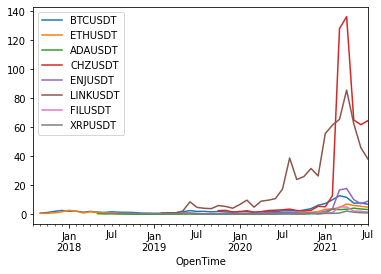

In [35]:
multpl_crypto_daily_returns = pd.DataFrame()
multpl_crypto_monthly_returns = pd.DataFrame()

for pair in pairs:
    multpl_crypto_daily_returns[pair] = crypto_pairs_dict[pair]['ClosePrice'].pct_change()
    multpl_crypto_monthly_returns[pair] = crypto_pairs_dict[pair]['ClosePrice'].resample('M').ffill().pct_change()

fig = plt.figure()
(multpl_crypto_monthly_returns + 1).cumprod().plot()
plt.show()

In [36]:
print(multpl_crypto_monthly_returns.mean())

BTCUSDT     0.071934
ETHUSDT     0.087064
ADAUSDT     0.119758
CHZUSDT     0.591969
ENJUSDT     0.209426
LINKUSDT    0.254566
FILUSDT     0.290497
XRPUSDT     0.073941
dtype: float64


In [37]:
print(multpl_crypto_monthly_returns.std())

BTCUSDT     0.256689
ETHUSDT     0.339136
ADAUSDT     0.546580
CHZUSDT     1.934284
ENJUSDT     0.757685
LINKUSDT    0.662230
FILUSDT     1.066558
XRPUSDT     0.459776
dtype: float64


In [38]:
print(multpl_crypto_monthly_returns.corr())

           BTCUSDT   ETHUSDT   ADAUSDT   CHZUSDT   ENJUSDT  LINKUSDT  \
BTCUSDT   1.000000  0.666381  0.521521  0.327037  0.276314  0.538469   
ETHUSDT   0.666381  1.000000  0.514526  0.132031  0.366213  0.634895   
ADAUSDT   0.521521  0.514526  1.000000  0.020168  0.239408  0.208787   
CHZUSDT   0.327037  0.132031  0.020168  1.000000  0.853077  0.007399   
ENJUSDT   0.276314  0.366213  0.239408  0.853077  1.000000  0.101121   
LINKUSDT  0.538469  0.634895  0.208787  0.007399  0.101121  1.000000   
FILUSDT   0.322483  0.098461  0.038497  0.973357  0.903818  0.075353   
XRPUSDT   0.268094  0.648697  0.336397  0.055848  0.297387  0.361137   

           FILUSDT   XRPUSDT  
BTCUSDT   0.322483  0.268094  
ETHUSDT   0.098461  0.648697  
ADAUSDT   0.038497  0.336397  
CHZUSDT   0.973357  0.055848  
ENJUSDT   0.903818  0.297387  
LINKUSDT  0.075353  0.361137  
FILUSDT   1.000000  0.068925  
XRPUSDT   0.068925  1.000000  


In [39]:
print(multpl_crypto_monthly_returns.cov())

           BTCUSDT   ETHUSDT   ADAUSDT   CHZUSDT   ENJUSDT  LINKUSDT  \
BTCUSDT   0.065889  0.058010  0.068564  0.147615  0.052882  0.086089   
ETHUSDT   0.058010  0.115013  0.086933  0.079842  0.089158  0.128426   
ADAUSDT   0.068564  0.086933  0.298750  0.025121  0.109599  0.080457   
CHZUSDT   0.147615  0.079842  0.025121  3.741454  1.346081  0.006702   
ENJUSDT   0.052882  0.089158  0.109599  1.346081  0.574086  0.053091   
LINKUSDT  0.086089  0.128426  0.080457  0.006702  0.053091  0.438549   
FILUSDT   0.098905  0.035189  0.036242  3.052965  1.175667  0.034472   
XRPUSDT   0.029513  0.092518  0.084499  0.060337  0.116468  0.117569   

           FILUSDT   XRPUSDT  
BTCUSDT   0.098905  0.029513  
ETHUSDT   0.035189  0.092518  
ADAUSDT   0.036242  0.084499  
CHZUSDT   3.052965  0.060337  
ENJUSDT   1.175667  0.116468  
LINKUSDT  0.034472  0.117569  
FILUSDT   1.137545  0.060583  
XRPUSDT   0.060583  0.211394  
